# Classification : 
L'objectif est de prédire l'espèce (species) ou la variété, qui est une **variable catégorielle**, d'une fleur d'Iris, en fonction des variables explicatives que sont la longueur du sépal (sepal_length), la largeur du sépal (sepal_width), les longueur et et largeur du pétal (petal_length et petal_width)  

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
iris = sns.load_dataset("iris")
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
# informations statistiques sur les variables quantitatives
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


([<matplotlib.patches.Wedge at 0x1f9121819a0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'virginica')])

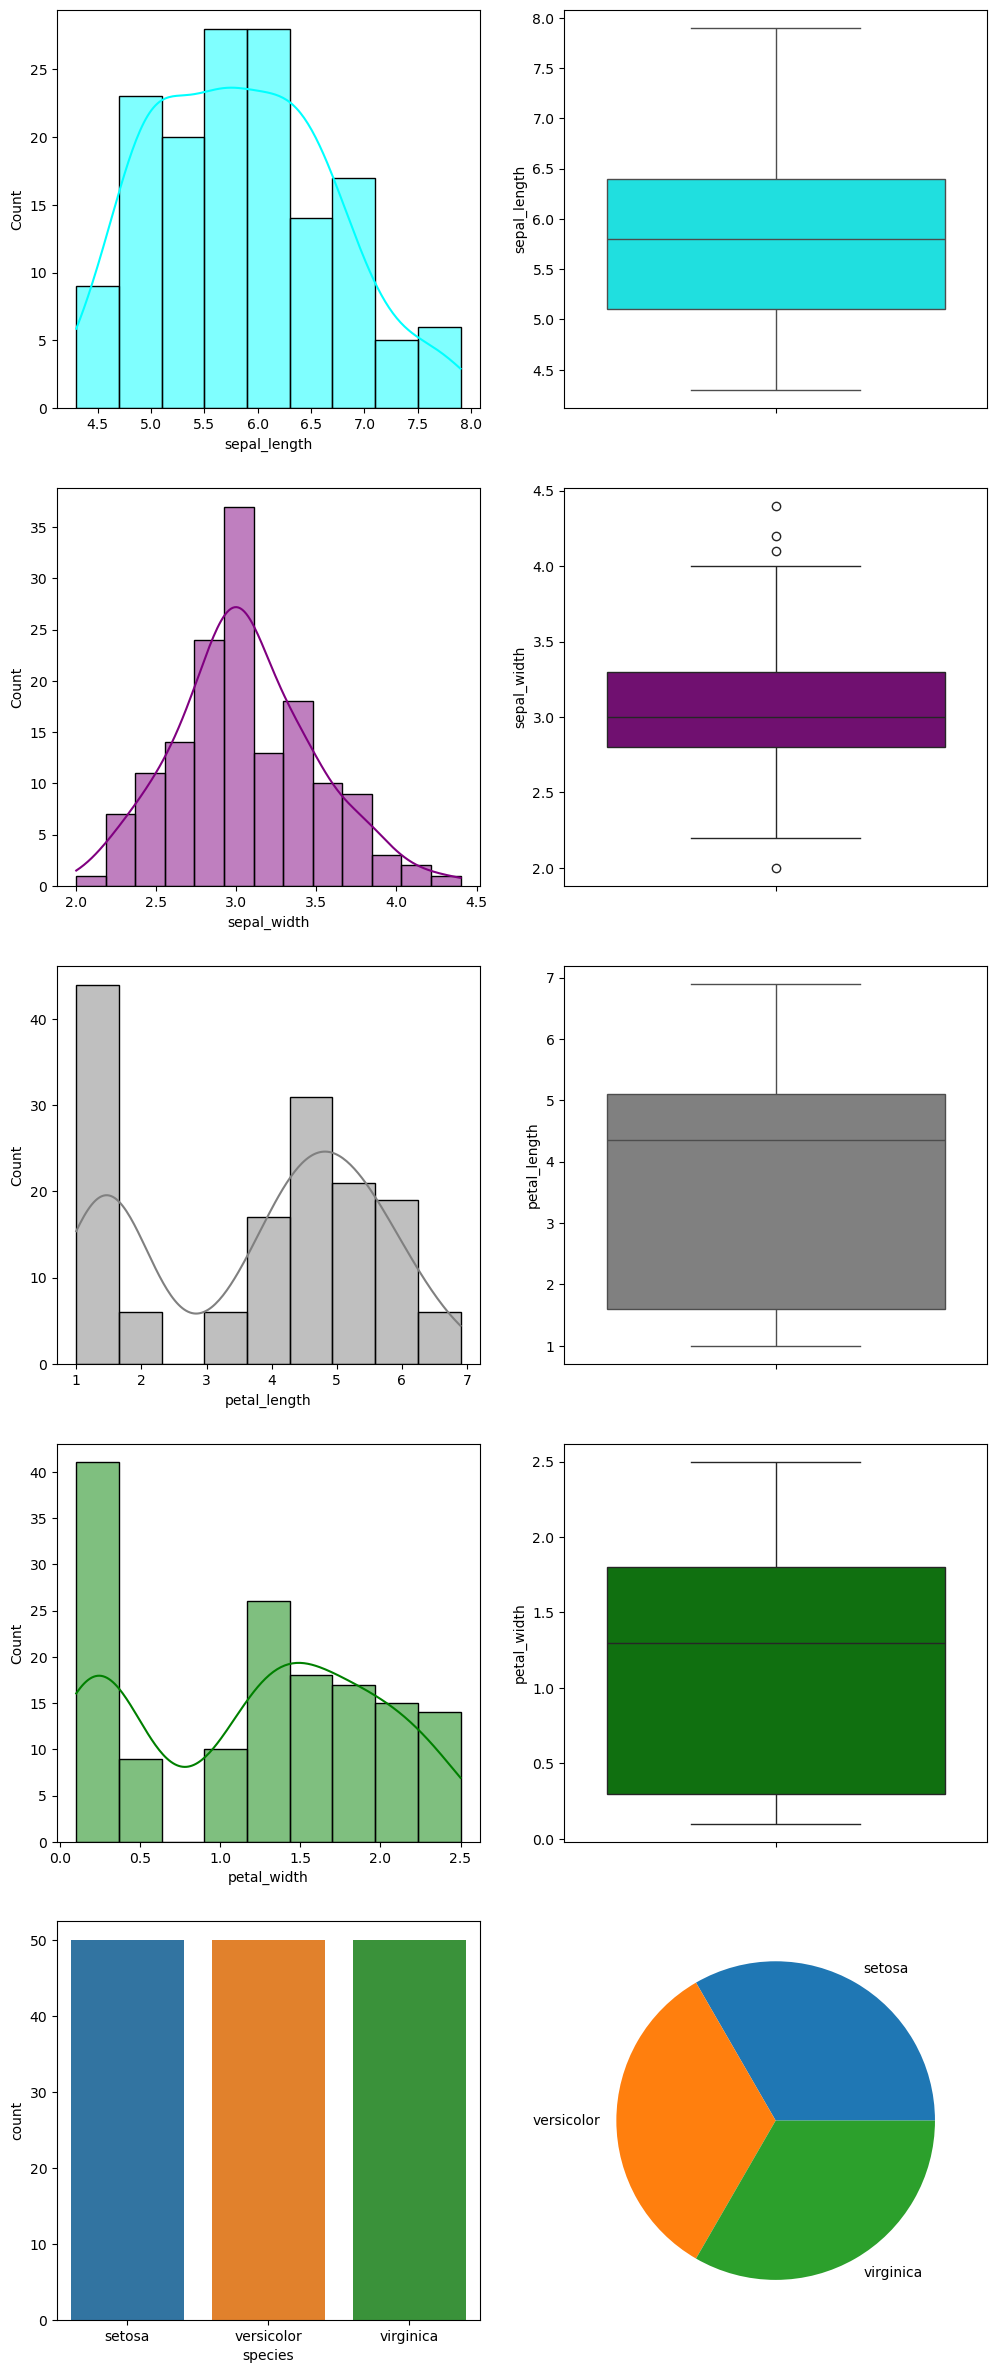

In [5]:
# Analyse univariée des variables
fig, axes = plt.subplots(5, 2, figsize = (12, 30))
# longueur du sépal
sns.histplot(iris["sepal_length"], color = "cyan", kde = True, ax = axes[0, 0])
sns.boxplot(iris["sepal_length"], color = "cyan", ax = axes[0, 1])
# largeur du sépal
sns.histplot(iris["sepal_width"], color = "purple", kde = True, ax = axes[1, 0])
sns.boxplot(iris["sepal_width"], color = "purple", ax = axes[1, 1])
# longueur du pétal
sns.histplot(iris["petal_length"], color = "gray", kde = True, ax = axes[2, 0])
sns.boxplot(iris["petal_length"], color = "gray", ax = axes[2, 1])
# largeur du pétal
sns.histplot(iris["petal_width"], color = "green", kde = True, ax = axes[3, 0])
sns.boxplot(iris["petal_width"], color = "green", ax = axes[3, 1])
sns.countplot(x = iris["species"], hue = iris["species"], ax = axes[4, 0])
axes[4, 1].pie(iris["species"].value_counts(), labels = iris["species"].unique())

la variable **sepal_with** (largeur du sépal) présente des valeurs aberrantes (outliers) 

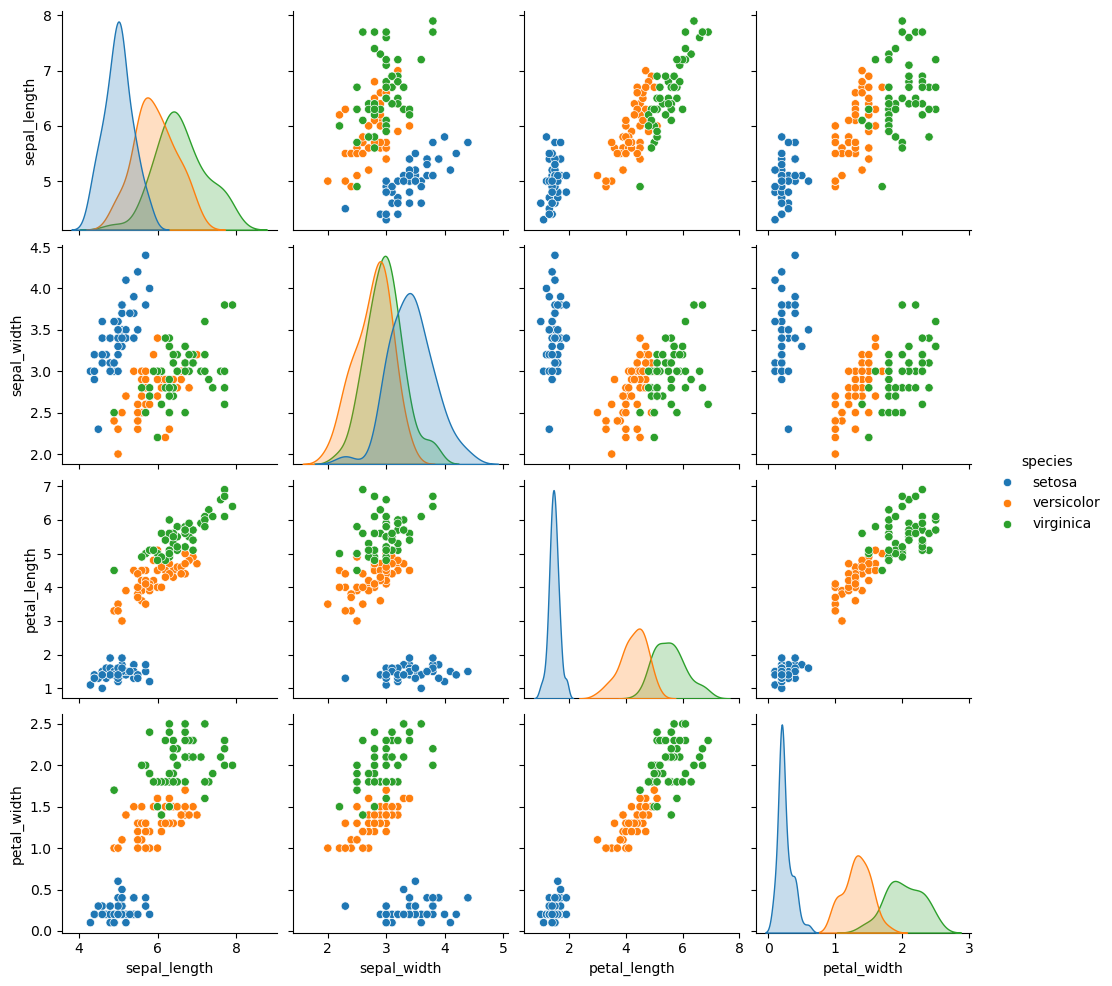

In [6]:
# Croisement deux à deux des variables quantitatives
sns.pairplot(iris, hue = "species")

In [7]:
# tableau de corrélation entre les variables quantitatives
iris.corr(numeric_only = True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

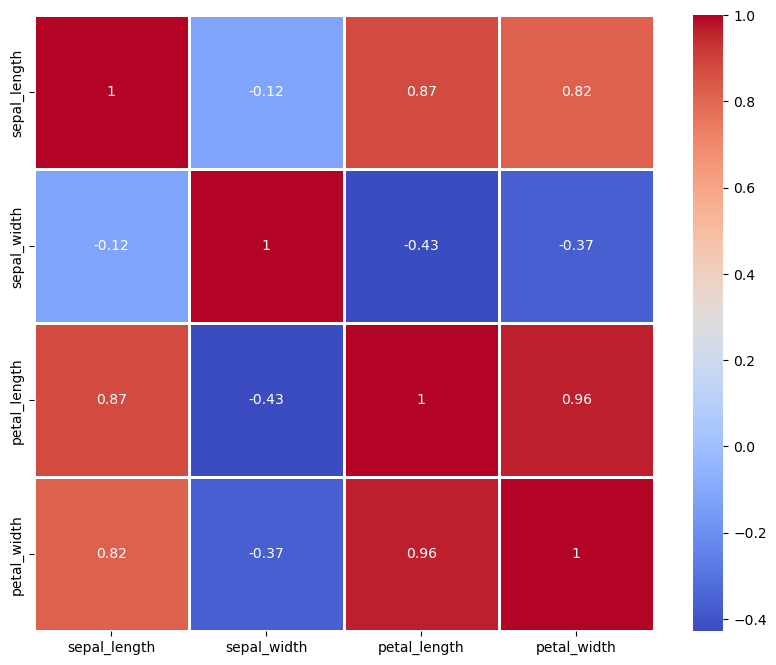

In [8]:
plt.figure(figsize = (10, 8))
sns.heatmap(iris.corr(numeric_only = True), cmap = "coolwarm", linewidths = 1, annot = True)

1. **corélation forte et positive** (> 0.8) entre :
   - la longueur du sépal et la longueur du pétal
   - la longueur du sépal et la largeur du pétal
   - la longueur du pétal et la largeur du pétal
2. **corrélation négative faible** entre :
   - la largeur du sépal et la largeur du pétal
   - la largeur du sépal et la longueur du pétal
La **corrélation** indique qu'il y'a une relation linéaire entre deux variables. La corrélation positive indique que les deux variables augmentent ensembles. Toutefois, ce n'est pas une causalité.

## Gestion des données manquantes : 
aucune donnée manquante.

In [9]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Gestion des outliers : variable 'sepal_width'

<Axes: ylabel='sepal_width'>

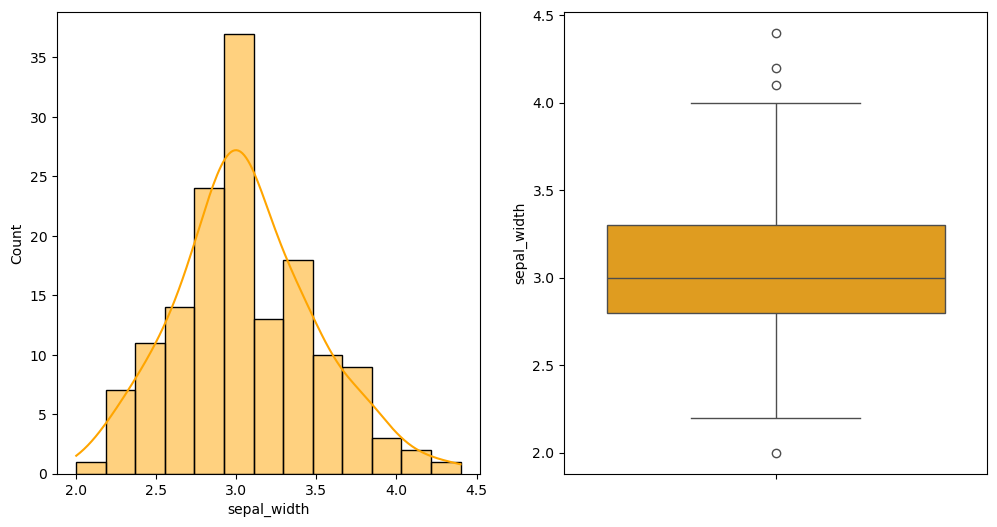

In [10]:
# largeur du sépal
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
sns.histplot(iris["sepal_width"], color = "orange", kde = True, ax = axes[0])
sns.boxplot(iris["sepal_width"], color = "orange", ax = axes[1])

### Imputation des valeurs abérrantes : 
Effectuons les tests nécessaires avant le choix d'imputation par la moyenne, médiane, quantiles, centiles, Winsorisation, etc..

In [23]:
# Séparation des variables explicatives et la variable cible (species)
X = iris.drop(["species"], axis = 1)
y = iris["species"]

In [24]:
from sklearn.model_selection import train_test_split
# Division des données en ensembles de test et d'entraînement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
print("taille des données d'entraînement : ", X_train.shape)
print("taille des données de test : ", X_test.shape)

taille des données d'entraînement :  (105, 4)
taille des données de test :  (45, 4)


# Les algorithmes de la méthode de Classification

## K-NN (k nearest neighbors) : 
Le K-Nearest Neighbors (KNN) est un algorithme d’apprentissage automatique supervisé utilisé pour la classification et la régression. Il est simple, intuitif et basé sur le principe que les observations similaires ont tendance à appartenir à la même classe.

KNN classe une nouvelle donnée en fonction de ses "K" voisins les plus proches. Il mesure la distance entre les points pour identifier les voisins les plus similaires. La classe majoritaire parmi les K voisins est attribuée à la nouvelle donnée.
**Illustration** : Si un point doit être classé et que ses 3 plus proches voisins sont A, A, B, alors KNN le classera comme "A" car c’est la classe dominante.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# instanciation du modèle
model = KNeighborsClassifier()

In [26]:
# entraînement du modèle
model.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
# évaluer la performance du modèle sur les données d'apprentissage
print("performances entraînement : ", model.score(X_train, y_train))

performances entraînement :  0.9809523809523809


Le score est la **précision** (accuracy) **des valeurs prédites sur les données d'apprentissage** en comparant les valeurs  prédites en prennant en entrée X_traint, et les valeurs attendues de y_train.

In [28]:
# Tester le modèle avec les données jamais rencontrées (X_test)
predictions = model.predict(X_test)

In [29]:
# évaluer la performance du modèle sur les données de test
print("performances test : ", model.score(X_test, y_test))

performances test :  0.9777777777777777
